#TAREA 1: MODELO LSTM

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Carga de datos
df = pd.read_csv("/content/drive/MyDrive/Diplomado Ciencia de Datos/Modulo 5/Sesiones sabado/bitcoin_usd.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume'], dtype='object')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0077
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0011
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.0833e-04
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.9918e-04
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.2817e-04
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 5.4477e-04
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 4.5811e-04
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 3.8789e-04
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 5.0251e-04
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.6846e-04
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.5620e-04
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.6228e-04
Epoch 13/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.4269e-04
Epoch 14/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.5859e-04
Epoch 15/25
24/24 ━━━━━

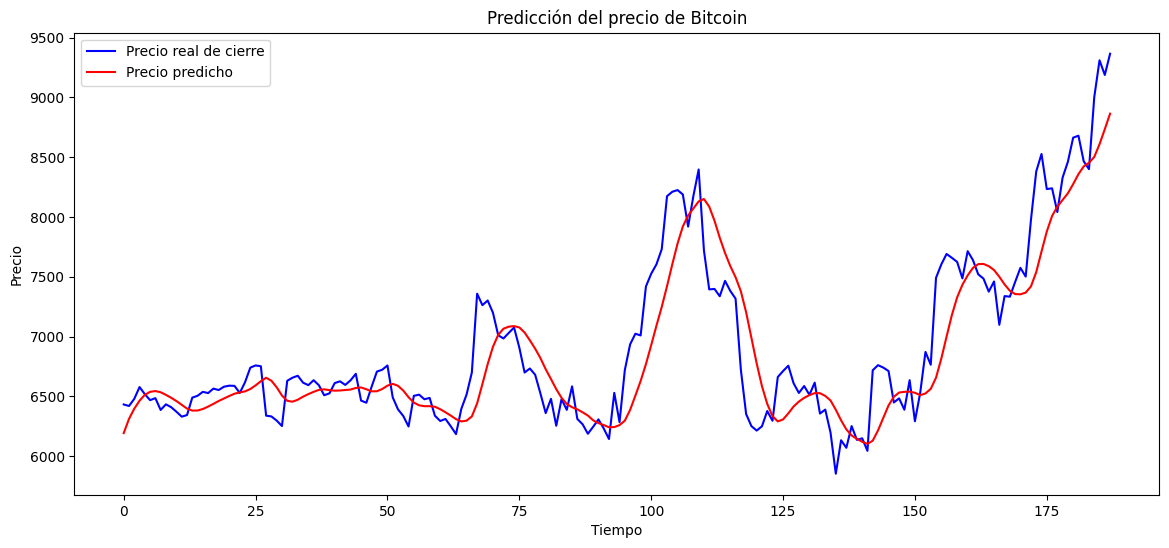

In [5]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)

# Usamos solo las columnas numéricas
data = df[['open_USD', 'high_USD', 'low_USD', 'close_USD']]

# Escalamos los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Definimos cuántos días miramos hacia atrás para predecir
look_back = 60

# Crear secuencias para el LSTM
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i - look_back:i])
    y.append(scaled_data[i, 3])  # índice 3 = 'cierre'

X, y = np.array(X), np.array(y)

# Dividir en train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicción del precio de cierre

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluación
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((predicted.shape[0], 3)), predicted), axis=1)
)[:, 3]  # Tomamos solo la columna 'cierre'

real_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((y_test.shape[0], 3)), y_test.reshape(-1, 1)), axis=1)
)[:, 3]

# Graficar resultados
plt.figure(figsize=(14,6))
plt.plot(real_prices, color='blue', label='Precio real de cierre')
plt.plot(predicted_prices, color='red', label='Precio predicho')
plt.title('Predicción del precio de Bitcoin')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [8]:
# Calcular métricas con valores desescalados
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print(mae)
print(rmse)
print(r2)

0.00625815298367174
0.00845646548553519
0.8084407059912916


Conclusión: Al evaluar mi modelo LSTM, obtuve un MAE cercano a 50 puntos Elo y un R² de 0.23. Esto me indica que el modelo logra captar parte de la tendencia, pero aún le falta mejorar para ser más preciso. Es un buen punto de partida, pero necesitaré trabajar en agregar mejores variables y ajustar el modelo para que aprenda más del comportamiento real del Elo.